## Basic Pandas Examples

This notebook will walk you through some very basic Pandas concepts. We will start with importing typical data science libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

Series is like a list or 1D-array, but with index. All operations are index-aligned.

In [2]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


One of the frequent usage of series is **time series**. In time series, index has a special structure - typically a range of dates or datetimes. We can create such an index with `pd.date_range`.

Suppose we have a series that shows the amount of product bought every day, and we know that every sunday we also need to take one item for ourselves. Here is how to model that using series:

Length of index is 366


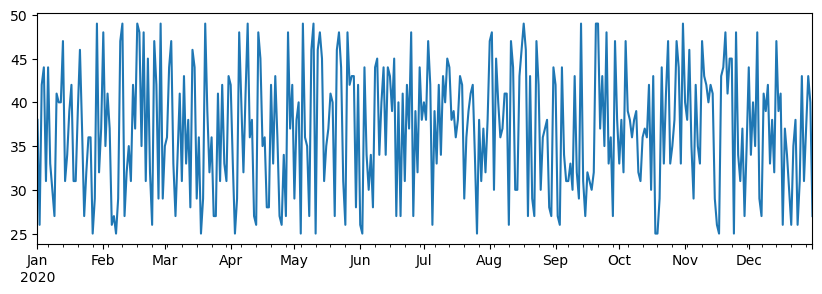

In [3]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [4]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


As you can see, we are having problems here, because in the weekly series non-mentioned days are considered to be missing (`NaN`), and adding `NaN` to a number gives us `NaN`. In order to get correct result, we need to specify `fill_value` when adding series:

2020-01-01    38.0
2020-01-02    26.0
2020-01-03    42.0
2020-01-04    44.0
2020-01-05    41.0
              ... 
2020-12-27    41.0
2020-12-28    37.0
2020-12-29    43.0
2020-12-30    40.0
2020-12-31    27.0
Length: 366, dtype: float64


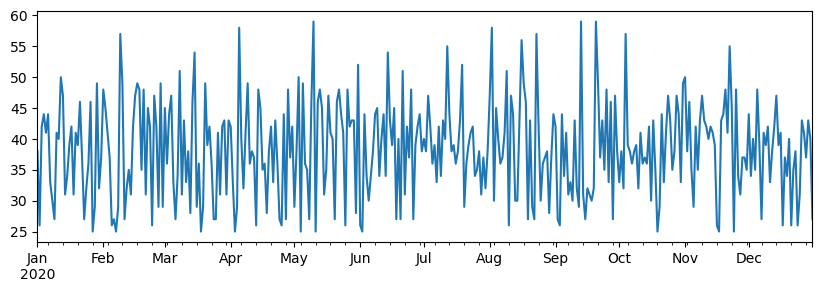

In [5]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

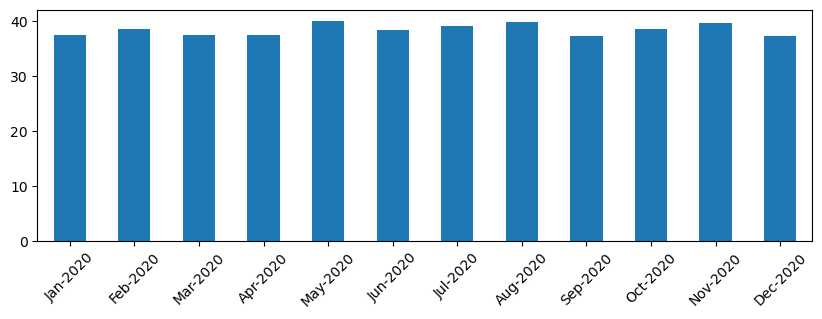

In [6]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

A dataframe is essentially a collection of series with the same index. We can combine several series together into a dataframe. Given `a` and `b` series defined above:

In [7]:
df = pd.DataFrame([a,b])
df

,0,1,2,3,4,5,6,7,8
0,1,2,3,4,5,6,7,8,9
1,I,like,to,use,Python,and,Pandas,very,much


We can also use Series as columns, and specify column names using dictionary:

In [8]:
df = pd.DataFrame({ 'A, natural numbers' : a, 'B, statement' : b })
df

,"A, natural numbers","B, statement"
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


The same result can be achieved by transposing (and then renaming columns, to match the previous example):

In [9]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


**Selecting columns** from DataFrame can be done like this:

In [11]:
print(f"Column A (series):\n{df['A, natural numbers']}")
print(f"Columns B and A (DataFrame):\n{df[['B, statement','A, natural numbers']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, natural numbers, dtype: int64
Columns B and A (DataFrame):
  B, statement  A, natural numbers
0            I                   1
1         like                   2
2           to                   3
3          use                   4
4       Python                   5
5          and                   6
6       Pandas                   7
7         very                   8
8         much                   9


**Selecting rows** based on filter expression:

In [12]:
df[df['A, natural numbers']<5]

,"A, natural numbers","B, statement"
0,1,I
1,2,like
2,3,to
3,4,use


The way it works is that expression `df['A']<5` returns a boolean series, which indicates whether expression is `True` or `False` for each elements of the series. When series is used as an index, it returns subset of rows in the DataFrame. Thus it is not possible to use arbitrary Python boolean expression, for example, writing `df[df['A']>5 and df['A']<7]` would be wrong. Instead, you should use special `&` operation on boolean series:

In [18]:
df[(df['A, natural numbers']>5) & (df['A, natural numbers']<7)]
# note that it is a single &

,"A, natural numbers","B, statement"
5,6,and


**Creating new computable columns**. We can easily create new computable columns for our DataFrame by using intuitive expressions. The code below calculates divergence of A from its mean value.

In [24]:
df['DivA'] = df['A, natural numbers']-df['A, natural numbers'].mean()
df

,"A, natural numbers","B, statement",DivA
0,1,I,-4.0
1,2,like,-3.0
2,3,to,-2.0
3,4,use,-1.0
4,5,Python,0.0
5,6,and,1.0
6,7,Pandas,2.0
7,8,very,3.0
8,9,much,4.0


What actually happens is we are computing a series, and then assigning this series to the left-hand-side, creating another column.

In [26]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B, statement']) # Wrong result
df

,"A, natural numbers","B, statement",DivA,LenB
0,1,I,-4.0,9
1,2,like,-3.0,9
2,3,to,-2.0,9
3,4,use,-1.0,9
4,5,Python,0.0,9
5,6,and,1.0,9
6,7,Pandas,2.0,9
7,8,very,3.0,9
8,9,much,4.0,9


In [28]:
df['LenB'] = df['B, statement'].apply(lambda x: len(x))
# or
df['LenB'] = df['B, statement'].apply(len)
df

,"A, natural numbers","B, statement",DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6
5,6,and,1.0,3
6,7,Pandas,2.0,6
7,8,very,3.0,4
8,9,much,4.0,4


**Selecting rows based on numbers** can be done using `iloc` construct. For example, to select first 5 rows from the DataFrame:

In [34]:
df.iloc[4:8]

,"A, natural numbers","B, statement",DivA,LenB
4,5,Python,0.0,6
5,6,and,1.0,3
6,7,Pandas,2.0,6
7,8,very,3.0,4


**Grouping** is often used to get a result similar to *pivot tables* in Excel. 

![sales data](https://support.content.office.net/en-us/media/195a25ed-8156-4b27-bda6-ca7a367c5c28.png) 
![corresponding pivot table](https://support.content.office.net/en-us/media/df21e682-db89-4e4c-bec1-da09e5201642.png)

sales data and corresponding pivot table from [microsoft365 support](https://support.microsoft.com/en-gb/office/overview-of-pivottables-and-pivotcharts-527c8fa3-02c0-445a-a2db-7794676bce96)

Suppose that we want to compute mean value of column `A` for each given number of `LenB`. Then we can group our DataFrame by `LenB`, and call `mean`:

In [50]:
# DON'T KNOW WHY IT ISN'T WORKING
df.groupby(by='LenB') #.mean()

If we need to compute mean and the number of elements in the group, then we can use more complex `aggregate` function:

In [42]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A, natural numbers' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A, natural numbers' : 'Mean'})

,Count,Mean
LenB,,
1,1,1.000000
2,1,3.000000
3,2,5.000000
4,3,6.333333
6,2,6.000000


## Printing and Plotting

Data Scientist often has to explore the data, thus it is important to be able to visualize it. When DataFrame is big, many times we want just to make sure we are doing everything correctly by printing out the first few rows. This can be done by calling `df.head()`. If you are running it from Jupyter Notebook, it will print out the DataFrame in a nice tabular form.

In [59]:
df.head()

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6



We have also seen the usage of `plot` function to visualize some columns. While `plot` is very useful for many tasks, and supports many different graph types via `kind=` parameter, you can always use raw `matplotlib` library to plot something more complex. We will cover data visualization in detail in separate course lessons.


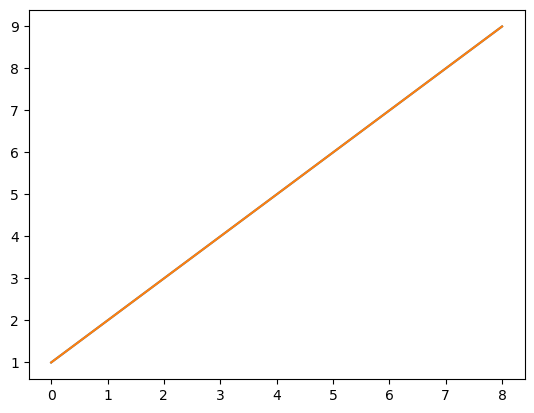

In [61]:
df['A'].plot()
plt.show()

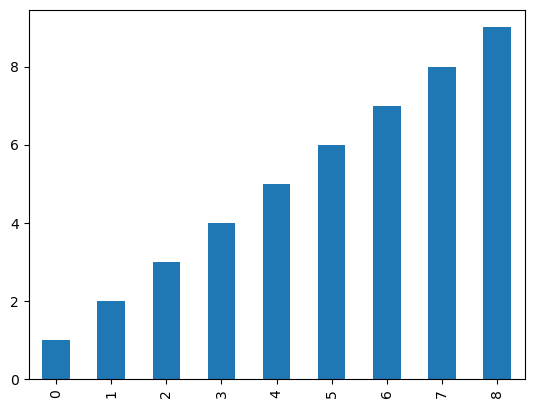

In [63]:
df['A'].plot(kind='bar')
plt.show()


This overview covers most important concepts of Pandas, however, the library is very rich, and there is no limit to what you can do with it! Let's now apply this knowledge for solving specific problem.